In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mean from population and from sample
1.5 1.7126497823976508
level 0.1
interval for mean
[0.6840222  2.74127737]


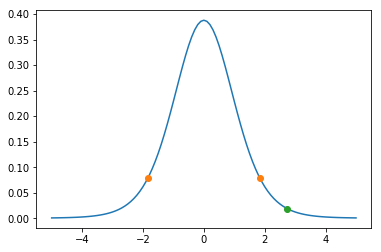

In [9]:

print('mean from population and from sample')
pop = stats.norm(1.5, 2.)
size = 10
sample = pop.rvs(size)
print(pop.mean(), sample.mean())

test = stats.t(size - 1)
abscissa = np.linspace(-5., 5., 101)
plt.plot(abscissa, test.pdf(abscissa))


level = 0.1
print('level', level)

interval = np.array([test.isf(level/2.), test.ppf(level/2.)]) #two-sided
#interval = np.array([test.isf(level), test.ppf(0.)]) #right-sided
#interval = np.array([test.isf(0.), test.ppf(level)]) #left-sided

plt.plot(interval, test.pdf(interval), 'o')

print('interval for mean')
print(sample.mean() - interval*sample.std(ddof=1) / np.sqrt(size))

statistics = np.sqrt(size) * (sample.mean() - pop.mean() / sample.std(ddof=1))
plt.plot(statistics, test.pdf(statistics), 'o')

plt.show()
                            

mean from population and from sample
2.0 -0.9653400873613661
1.5 1.2596576790562242
level: 0.1
interval for difference for mean
[-47.25279447  42.80279894]


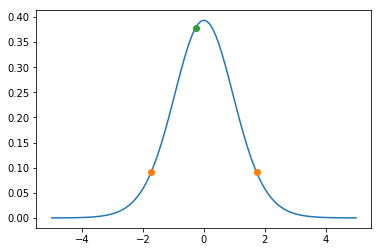

In [39]:
# statystyka z dwóch populacji losowanych z rozkładu normalnego

print('mean from population and from sample')

std = 5. #unknown
# o nieznanych wartościach oczekiwanych i nieznanych (ALE JEDNAKOWYCH) odchyleniach standardowych)

pop1 = stats.norm(2., std)
size1 = 10
sample1 = pop1.rvs(size1)

pop2 = stats.norm(1.5, std)
size2 = 10
sample2 = pop2.rvs(size2)

print(pop1.mean(), sample1.mean())
print(pop2.mean(), sample2.mean())

test = stats.t(size1 + size2 - 2) # size changed
abscissa = np.linspace(-5., 5., 101)
plt.plot(abscissa, test.pdf(abscissa))


level = 0.1
print('level:', level)

interval = np.array([test.isf(level/2.), test.ppf(level/2.)]) #two-sided
#interval = np.array([test.isf(level), test.ppf(0.)]) #right-sided
#interval = np.array([test.isf(0.), test.ppf(level)]) #left-sided

plt.plot(interval, test.pdf(interval), 'o')

print('interval for difference for mean')
print((sample1.mean() - sample2.mean()) - interval * np.sqrt((size1 + size2) / (size1 + size2 -1)) \
               * np.sqrt((size1 -1) * sample1.std(ddof=1)**2 + (size2 - 1)* sample2.std(ddof=1)**2))
#print(sample.mean() - interval*sample.std(ddof=1) / np.sqrt(size)) #changed
#print(sample.mean() - interval*sample.std(ddof=1) / np.sqrt(size)) #changed

statistics = ((sample1.mean() - sample2.mean()) - (pop1.mean() - pop2.mean())) \
               * np.sqrt((size1 + size2 - 2) / (size1 + size2)) \
               / np.sqrt((size1 - 1) * sample.std(ddof=1) + (size2 - 1) * sample2.std(ddof=1)) #changed
plt.plot(statistics, test.pdf(statistics), 'o')

plt.show()
                            

2.0 3.1865084430736825
level 0.1
interval for error
[0.65103166        inf]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


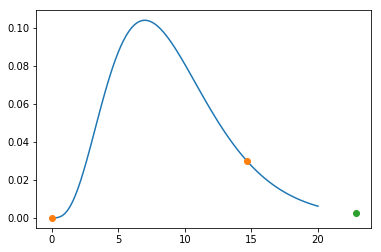

In [33]:
# Chi2

pop = stats.norm(1.5, 2.)
size = 10
sample = pop.rvs(size)
print(pop.std(), sample.std(ddof=1.))

chi2 = stats.chi2(size - 1)
abscissa = np.linspace(0., 20., 101)
plt.plot(abscissa, chi2.pdf(abscissa))

level = 0.1 # 1-alfa - poziom ufności #  0.9 = alfa - poziom istotności
print('level', level)

#interval = np.array([chi2.isf(level/2.), chi2.ppf(level/2.)]) #two-sided
interval = np.array([chi2.isf(level), chi2.ppf(0.)]) #right-sided
#interval = np.array([chi2.isf(0.), chi2.ppf(level)]) #left-sided

plt.plot(interval, chi2.pdf(interval), 'o')

print('interval for error')
print(np.sqrt(size - 1) / interval * sample.std(ddof=1))

statistics = (size - 1) * (sample.std(ddof=1)**2 / pop.std()**2)
plt.plot(statistics, chi2.pdf(statistics), 'o')

plt.show()

mean from population and from sample
level 0.1
interval for mean with known dispersion
[0.22035635 3.22343447]
interval for mean with unknown dispersion
[0.14949342 3.2942974 ]


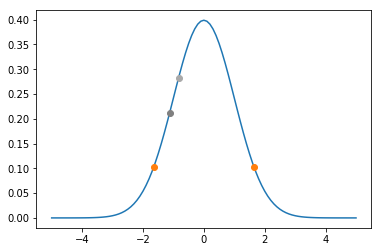

In [42]:
# mamy populacje dowolną (nawet niewiadomo czy jest ona normalna)
# chcemy wyznaczyć przedział ufności dla wartości oczekiwanej, tzw. średnią z populacji

print("mean from population and from sample")
pop = stats.uniform(loc=1, scale=10.) #np. rozkład jednorodny

test = stats.norm()
abscissa = np.linspace(-5., 5., 101)
plt.plot(abscissa, test.pdf(abscissa))

level = 0.1 # poziom ufności # 1 - 0.9 = poziom istotności
print('level', level)


interval = np.array([test.isf(level/2.), test.ppf(level/2.)]) #two-sided
#interval = np.array([test.isf(level), test.ppf(0.)]) #right-sided
#interval = np.array([test.isf(0.), test.ppf(level)]) #left-sided

plt.plot(interval, test.pdf(interval), 'o')

print('interval for mean with known dispersion')
print(sample.mean() - interval*pop.std() / np.sqrt(size))
statistics = np.sqrt(size) * (sample.mean() - pop.mean() / pop.std())
plt.plot(statistics, test.pdf(statistics), 'o', color='grey')

print('interval for mean with unknown dispersion')
print(sample.mean() - interval*sample.std() / np.sqrt(size))
statistics = np.sqrt(size) * (sample.mean() - pop.mean() / sample.std())
plt.plot(statistics, test.pdf(statistics), 'o', color='darkgrey')

plt.show()

6.0 5.746161322098893
level 0.1
interval for mean
[5.27133298 6.22098966]


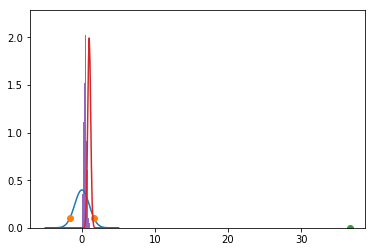

In [49]:
# with bootstrap
# jak wyznaczyć przedział ufności dla wartości oczekiwanej (na podst. schodkowego histogramu, a la rozkład normalny)

expected = 1.
dispersion = 2.
size = 100

sample = stats.norm.rvs(loc=expected, scale=dispersion, size=size)

count = 1000 # tyle powtórnych próbek
re_averages = np.empty(count)

for i in range(count):
    resample = sample[np.random.randint(sample.size, size=sample.size)]
    re_averages[i] = resample.mean()

#abscissa = np.linspace(0., 2., 101)    


# ------------------- 

pop = stats.uniform(loc=1., scale=10.)
size = 100
sample = pop.rvs(size)
print(pop.mean(), sample.mean())

test = stats.norm()
abscissa = np.linspace(-5., 5., 101)
plt.plot(abscissa, test.pdf(abscissa))

level = 0.1 # poziom ufności # 1 - 0.9 = poziom istotności
print('level', level)

interval = np.array([test.isf(level/2.), test.ppf(level/2.)]) #two-sided
#interval = np.array([test.isf(level), test.ppf(0.)]) #right-sided
#interval = np.array([test.isf(0.), test.ppf(level)]) #left-sided

plt.plot(interval, test.pdf(interval), 'o')

print('interval for mean')
print(sample.mean() - interval * pop.std() / np.sqrt(size))

statistics = np.sqrt(size) * (sample.mean() - pop.mean() / pop.std())
plt.plot(statistics, test.pdf(statistics), 'o')

plt.plot(abscissa, stats.norm.pdf(abscissa, loc=expected, scale=dispersion/np.sqrt(size)))
plt.hist(re_averages, density=True, range=(0., 2.), bins=100)

plt.show()             

In [ ]:

pop = stats.norm(1., 2.)
size = 100
sample = pop.rvs(size)
print(pop.std(), sample.std(ddof=1.))

test = stats.chi2(size - 1)
abscissa = np.linspace(0., 20., 101)
plt.plot(abscissa, chi2.pdf(abscissa))

level = 0.1 # 1-alfa - poziom ufności #  0.9 = alfa - poziom istotności
print('level', level)

#interval = np.array([chi2.isf(level/2.), chi2.ppf(level/2.)]) #two-sided
interval = np.array([chi2.isf(level), chi2.ppf(0.)]) #right-sided
#interval = np.array([chi2.isf(0.), chi2.ppf(level)]) #left-sided

plt.plot(interval, chi2.pdf(interval), 'o')

print('interval for error')
print(np.sqrt(size - 1) / interval * sample.std(ddof=1))

statistics = (size - 1) * (sample.std(ddof=1)**2 / pop.std()**2)
plt.plot(statistics, chi2.pdf(statistics), 'o')

plt.show()